# Question 1

In [489]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork2/DIstanceTimeDataset%20-%20StudentsHomeTownDistance.csv')
data.head()

,Location Name,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
0,surat,18.0,1020.0,1.0,0.0,0.0
1,Kolkata,18.0,870.0,0.0,0.0,1.0
2,Hyderabad,13.5,676.0,0.0,0.0,1.0
3,Hyderabad,13.5,680.0,0.0,0.0,1.0
4,Delhi,18.0,977.0,1.0,0.0,0.0


In [490]:
# null values
data.isnull().sum()

,0
Location Name,2
Time to Reach (hr),3
Distance (km),3
Train Only,3
Road Only,3
Train+Road,3


In [491]:
data.dropna(inplace=True)
data.isnull().sum()

,0
Location Name,0
Time to Reach (hr),0
Distance (km),0
Train Only,0
Road Only,0
Train+Road,0


In [492]:
data.describe()

,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,17.706809,898.574468,0.468085,0.085106,0.446809
std,7.690018,368.372374,0.504375,0.282057,0.502538
min,0.500000,9.000000,0.000000,0.000000,0.000000
25%,13.500000,678.000000,0.000000,0.000000,0.000000
50%,18.000000,900.000000,0.000000,0.000000,0.000000
75%,20.500000,1097.000000,1.000000,0.000000,1.000000
max,48.000000,1800.000000,1.000000,1.000000,1.000000


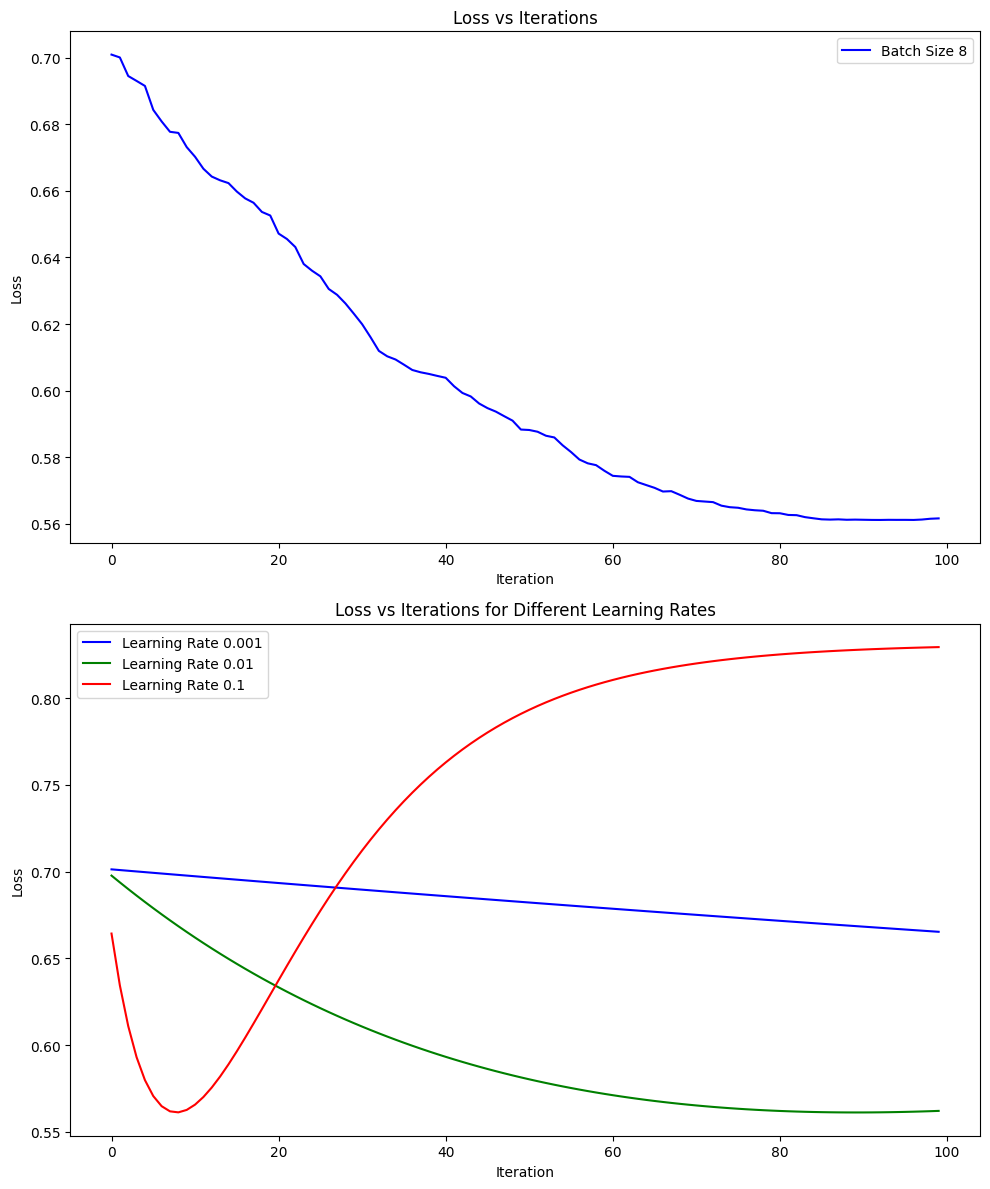

Final weights: [1.50207627]
Final loss: 0.83


In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class GradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.loss_history = []
        self.gradient_norm_history = []

    def initialize_weights(self, n_features):
        # Initialize W as 0.35
        self.weights = np.full(n_features, 0.35)

    def compute_gradient(self, X, y, batch_indices=None):
        if batch_indices is None:
            batch_indices = np.arange(len(y))

        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        # Predictions (non-negative)
        y_pred = np.maximum(0, np.dot(X_batch, self.weights))

        # Compute gradients
        gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(batch_indices)
        return gradient

    def compute_loss(self, X, y):
        y_pred = np.maximum(0, np.dot(X, self.weights))
        return np.mean((y_pred - y) ** 2)

    def train(self, X, y, batch_size=None):
        self.initialize_weights(X.shape[1])
        n_samples = len(y)

        for i in range(self.n_iterations):
            if batch_size:
                # Batch gradient descent
                batch_indices = np.random.choice(n_samples, batch_size, replace=False)
                gradient = self.compute_gradient(X, y, batch_indices)
            else:
                # Full gradient descent
                gradient = self.compute_gradient(X, y)

            # Update weights
            self.weights -= self.learning_rate * gradient

            # Record loss and gradient norm
            self.loss_history.append(self.compute_loss(X, y))
            self.gradient_norm_history.append(np.linalg.norm(gradient))

def plot_training_progress(X, y, batch_sizes=[8]):
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))
    colors = ['b', 'g', 'r']

    # Train with specified batch size
    gd = GradientDescent(learning_rate=0.01, n_iterations=100)
    gd.train(X, y, batch_size=batch_sizes[0])

    # Plot loss
    axes[0].plot(gd.loss_history, color=colors[0], label=f'Batch Size {batch_sizes[0]}')
    axes[0].set_title('Loss vs Iterations')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Compare different learning rates
    learning_rates = [0.001, 0.01, 0.1]
    for lr, color in zip(learning_rates, colors):
        gd = GradientDescent(learning_rate=lr, n_iterations=100)
        gd.train(X, y)
        axes[1].plot(gd.loss_history, color=color, label=f'Learning Rate {lr}')

    axes[1].set_title('Loss vs Iterations for Different Learning Rates')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    plt.tight_layout()
    return fig, gd

def main(data):
    # Prepare data
    df = data.copy()
    df['Time to Reach (hr)'] = pd.to_numeric(df['Time to Reach (hr)'], errors='coerce')
    df['Distance (km)'] = pd.to_numeric(df['Distance (km)'], errors='coerce')
    df = df.dropna()

    # Extract features and target
    X = df[['Time to Reach (hr)']].values
    y = df['Distance (km)'].values

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train and visualize
    fig, model = plot_training_progress(X_scaled, y)
    plt.show()

    # Print final weights and loss
    print(f"Final weights: {model.weights}")
    print(f"Final loss: {model.loss_history[-1]:.2f}")

    return model

# Example usage:
if __name__ == "__main__":
    model = main(data)

# Question 3

In [ ]:
import pandas as pd
import numpy as np

# Install openpyxl if not already installed
!pip install openpyxl

def xlsx_to_dataframe(file_path):
  try:
    df = pd.read_excel(file_path, engine='openpyxl')  # Use openpyxl engine
    return df
  except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

# Example usage
# file_path = 'https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork2/HW2Q3.csv'
file_path = '/content/DSAICourseInterestRelevanceSurvey.xlsx'
df = xlsx_to_dataframe(file_path)

if df is not None:

    try:
      cropped_df = df.iloc[0:24, 0:11] # Crop the DataFrame
      cropped_matrix = cropped_df.values # Convert to NumPy matrix
      print(cropped_matrix)

    except IndexError:
      print("Error: Cropping indices out of bounds. Check your DataFrame dimensions.")
    except Exception as e:
      print(f"An error occurred during cropping or matrix conversion: {e}")

In [ ]:
#randomly suffle the student


if df is not None:
    try:
        # Crop the DataFrame (adjust indices as needed)
        cropped_df = df.iloc[0:24, 0:11]

        # Shuffle the DataFrame randomly
        shuffled_df = cropped_df.sample(frac=1).reset_index(drop=True)
        shuffled_df = shuffled_df.drop(columns=['Unnamed: 0'])
        # Display the shuffled DataFrame in tabular format
        print(shuffled_df)

    except IndexError:
        print("Error: Cropping indices out of bounds. Check your DataFrame dimensions.")
    except Exception as e:
        print(f"An error occurred during shuffling or display: {e}")

In [ ]:
def replace_data(df, percentage):
    try:
        # Exclude first row and first column
        df_to_modify = df.iloc[:, 1:]

        total_cells = df_to_modify.size
        num_cells_to_replace = int(total_cells * (percentage / 100))

        # Generate random row and column indices for the modified DataFrame
        row_indices = np.random.choice(df_to_modify.index, size=num_cells_to_replace, replace=True)
        col_indices = np.random.choice(df_to_modify.columns, size=num_cells_to_replace, replace=True)

        # Replace values in the original DataFrame using the modified indices
        for row, col in zip(row_indices, col_indices):
              df.loc[row, col] = np.nan
        return df
    except (ValueError, TypeError):
        print("Error: Invalid input. Percentage must be a number between 0 and 100.")
        return df  # Return original DataFrame on error
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

## Problem Statement: Missing Data Prediction and Analysis

You are provided with a dataset ([DSAICourseInterestRelevanceSurvey.xlsx](https://docs.google.com/spreadsheets/d/1oUyjxtFn_TmuQZkaJqEfISq4RTX9MVNuQUx2YbuMTHM/edit?gid=0#gid=0)) containing survey responses about student interest and courses. Your task is to simulate the scenario of missing data and build a model to predict those missing values.

Tasks:

Data Preprocessing:
Experiment with missing data percentages ranging from 20% to 80%.

Model Building:
Write a algorithms such that it predicts the missing values(e.g., Linear Regression).

Evaluation and Visualization:
Calculate the Mean Squared Error (MSE) to evaluate the accuracy of your predictions. The MSE measures the average squared difference between the actual and predicted values.
Create a plot to visualize the relationship between the actual and predicted values.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer



df = shuffled_df.copy()
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df).round()
# print(df)
for percentage in [20, 40, 60, 80]:
    modified_df = replace_data(shuffled_df, percentage)

    # print(modified_df)
    # Step 3: imputation
    # imputer = SimpleImputer(strategy='mean')
    # modified_df = imputer.fit_transform(modified_df)
    imputer = KNNImputer(n_neighbors=5)
    modified_df = imputer.fit_transform(shuffled_df)

    # Step 4: Split data into features (X) and target (y) for prediction
    X = modified_df[:, 1:]
    y = df[:, 0]

    # Step 5: Train the Linear Regression Model
    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X).round()

    # Step 7: Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, predictions)
    print(f'Mean Squared Error: {mse}')

    # Step 8: Plot the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions, color='blue', label='Predictions')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()